In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.display import display, clear_output

import os
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

In [6]:
s3 = boto3.client('s3')

s3 = boto3.client('s3')
bucket_name = 'rxrx-data'

# Define files to download
files_to_download = [
    {'key': 'rxrx19a/RxRx19a/embeddings.csv', 'filename': 'data/rxrx19a_embeddings.csv'},
    {'key': 'rxrx19a/RxRx19a/metadata.csv', 'filename': 'data/rxrx19a_metadata.csv'},
    {'key': 'rxrx19b/embeddings.csv', 'filename': 'data/rxrx19b_embeddings.csv'},
    {'key': 'rxrx19b/metadata.csv', 'filename': 'data/rxrx19b_metadata.csv'}
]

# Create 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Define function to download file from S3
def download_file_from_s3(s3_client, bucket, key, local_filename):
    try:
        print(f"Downloading {key} to {local_filename}...")
        s3_client.download_file(bucket, key, local_filename)
        print(f"Downloaded: {local_filename}")
    except Exception as e:
        print(f"Error downloading {key}: {e}")

# Download each file
for file in files_to_download:
    download_file_from_s3(s3, bucket_name, file['key'], file['filename'])


Downloaded: data/rxrx19a_embeddings.csv
Downloaded: data/rxrx19a_metadata.csv
Downloaded: data/rxrx19b_embeddings.csv
Downloaded: data/rxrx19b_metadata.csv


In [9]:
rxrx19a_metadata = pd.read_csv('data/rxrx19a_metadata.csv', index_col=0)
rxrx19b_metadata = pd.read_csv('data/rxrx19b_metadata.csv', index_col=0)

rxrx19a_metadata.head()
rxrx19b_metadata.head()

,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
site_id,,,,,,,,,,
HRCE-1_1_AA02_1,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,1,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
HRCE-1_1_AA02_2,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,2,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
HRCE-1_1_AA02_3,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,3,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
HRCE-1_1_AA02_4,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,4,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
HRCE-1_1_AA03_1,HRCE-1_1_AA03,HRCE,HRCE-1,1,AA03,1,Active SARS-CoV-2,acetylcysteine,1.0,"CC(=O)N[C@H](CS)C(O)=O |a:4,r|"


,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
site_id,,,,,,,,,,
HUVEC-1_1_AA02_1,HUVEC-1_1_AA02,HUVEC,HUVEC-1,1,AA02,1,storm-severe,Ravoxertinib,1.00,CN1N=CC=C1NC1=NC=CC(=N1)C1=CC(=O)N(C=C1)C(CO)C...
HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,storm-severe,Diphenylpyraline,0.25,"CN1CCC(CC1)OC(C1=CC=CC=C1)C1=CC=CC=C1 |c:12,14..."
HUVEC-1_1_AA04_1,HUVEC-1_1_AA04,HUVEC,HUVEC-1,1,AA04,1,storm-severe,Indirubin,1.00,O=C1NC2=CC=CC=C2\C1=C1\NC2=C(C=CC=C2)C1=O |c:5...
HUVEC-1_1_AA05_1,HUVEC-1_1_AA05,HUVEC,HUVEC-1,1,AA05,1,storm-severe,YO-01027,1.00,C[C@H](NC(=O)CC1=CC(F)=CC(F)=C1)C(=O)N[C@H]1C2...
HUVEC-1_1_AA07_1,HUVEC-1_1_AA07,HUVEC,HUVEC-1,1,AA07,1,storm-severe,taurine,1.00,NCCS(O)(=O)=O


Metadata info

In [26]:
rxrx19a_metadata['cell_type'].value_counts()
rxrx19a_metadata['disease_condition'].value_counts()
rxrx19a_metadata['treatment'].value_counts()

rxrx19b_metadata['cell_type'].value_counts()
rxrx19b_metadata['disease_condition'].value_counts()
rxrx19b_metadata['treatment'].value_counts()

cell_type
HRCE    284080
VERO     21440
Name: count, dtype: int64

disease_condition
Active SARS-CoV-2            280376
UV Inactivated SARS-CoV-2      9120
Mock                           9120
Name: count, dtype: int64

treatment
Ribavirin                        864
Favipiravir                      864
Indomethacin                     864
Tenofovir Disoproxil Fumarate    864
Lopinavir                        864
                                ... 
fluspirilene                     144
Thiocolchicoside                 144
DEET                             144
Salmeterol                       144
Phenytoin                        144
Name: count, Length: 1669, dtype: int64

cell_type
HUVEC    70384
Name: count, dtype: int64

disease_condition
storm-severe    67364
healthy          2756
Name: count, dtype: int64

treatment
Allopregnanolone    72
dorzolamide         36
trelagliptin        36
gidazepam           36
YK-4-279            36
                    ..
CPI-203             24
AZD1080             24
MK-2206             24
AMG-900             24
Lovastatin          24
Name: count, Length: 1856, dtype: int64

In [27]:
rxrx19a_metadata.dropna(subset='treatment').pipe(lambda df: df.loc[df['treatment'].str.endswith('ib'), :])['treatment'].unique()
rxrx19b_metadata.dropna(subset='treatment').pipe(lambda df: df.loc[df['treatment'].str.endswith('ib'), :])['treatment'].unique()


array(['S-Ruxolitinib', 'Baricitinib', 'Dabrafenib', 'Carfilzomib',
       'Duvelisib', 'Peficitinib', 'Binimetinib', 'Abemaciclib',
       'Axitinib', 'Entrectinib', 'osimertinib', 'Pexidartinib',
       'Sorafenib', 'Lenvatinib', 'Dasatinib', 'Ribociclib',
       'Gilteritinib', 'deracoxib', 'Acalabrutinib', 'Cobimetinib',
       'Nintedanib', 'Regorafenib', '(S)-crizotinib', 'Larotrectinib',
       'Lorlatinib', 'Dacomitinib', 'Talazoparib', 'ceritinib',
       'Lumiracoxib', 'Quizartinib', 'Olaparib', 'Parecoxib',
       'Crizotinib', 'Apatinib', 'Ruxolitinib', 'Palbociclib',
       'Ivosidenib', 'Idelalisib', 'Pacritinib', 'silmitasertib',
       'brigatinib', 'Icotinib', 'Olmutinib', 'firocoxib', 'anlotinib',
       'Fostamatinib', 'Ibrutinib', 'Lapatinib', 'Bortezomib', 'afatinib',
       'Vismodegib', 'Trametinib', 'alpelisib', 'Enasidenib', 'Erlotinib',
       'Valdecoxib', 'Vandetanib', 'Erismodegib', 'Nilotinib',
       'Sunitinib', 'Niraparib', 'Celecoxib', 'Bosutinib', 'Ca

array(['Ravoxertinib', 'Lapatinib', 'Cediranib', 'miransertib',
       'Tozasertib', 'Ipatasertib', 'Filanesib', 'Refametinib',
       'Ulixertinib', 'Gedatolisib', 'Cerdulatinib', 'Afuresertib',
       'Linsitinib', 'Afatinib', 'Fenebrutinib', 'Tipifarnib',
       'Golvatinib', 'vactosertib', 'Bafetinib', 'Ispinesib',
       'Dactolisib', 'Filgotinib', 'Foretinib', 'Lonafarnib',
       'Ralimetinib', 'Tofacitinib', 'Pexmetinib', 'Celecoxib',
       'alpelisib', 'Trametinib', 'Bosutinib', 'Bortezomib', 'Pazopanib',
       'Vismodegib', 'afatinib', 'Niraparib', 'Valdecoxib', 'Tivozanib',
       'Fostamatinib', 'Ibrutinib', 'Erismodegib', 'Cabozantinib',
       'Enasidenib', 'Sunitinib', 'Nilotinib', 'Gefitinib', 'Vandetanib',
       'S-Ruxolitinib', 'Baricitinib', 'silmitasertib', 'Erlotinib',
       'Imatinib', 'Dabrafenib', 'Pacritinib', 'brigatinib', 'Idelalisib',
       'Carfilzomib', 'anlotinib', 'Olmutinib', 'Icotinib', 'firocoxib',
       'Etoricoxib', 'Apatinib', 'Crizotinib', '

In [10]:
rxrx19a_embeddings = pd.read_csv('data/rxrx19a_embeddings.csv', index_col=0)
rxrx19b_embeddings = pd.read_csv('data/rxrx19b_embeddings.csv', index_col=0)

In [1]:
rxrx19a_embeddings.count

NameError: name 'rxrx19a_embeddings' is not defined

In [11]:
def create_anndata(embeddings: pd.DataFrame, metadata: pd.DataFrame, file_name=None):
    """
    Combines embeddings and metadata into an AnnData object and saves as an h5ad file.
    
    Parameters:
    embeddings (pd.DataFrame): DataFrame containing the embeddings.
    metadata (pd.DataFrame): DataFrame containing the metadata.
    file_name (str): Name of the file to save the AnnData object (e.g., 'rxrx19a.h5ad').
    
    Returns:
    adata (AnnData): The created AnnData object.
    """
    # create the AnnData object using the embeddings
    adata = ad.AnnData(X=embeddings.values)
    
    # set site_id as the index for both dataframes
    adata.obs = metadata
    adata.var_names = embeddings.columns

    if file_name is not None:
        # save the AnnData object to an h5ad file
        adata.write(file_name)
    
    return adata

rxrx19a_adata = create_anndata(rxrx19a_embeddings, rxrx19a_metadata)
rxrx19b_adata = create_anndata(rxrx19b_embeddings, rxrx19b_metadata)

rxrx19a_adata
rxrx19b_adata

AnnData object with n_obs × n_vars = 305520 × 1024
    obs: 'well_id', 'cell_type', 'experiment', 'plate', 'well', 'site', 'disease_condition', 'treatment', 'treatment_conc', 'SMILES'

AnnData object with n_obs × n_vars = 70384 × 128
    obs: 'well_id', 'cell_type', 'experiment', 'plate', 'well', 'site', 'disease_condition', 'treatment', 'treatment_conc', 'SMILES'

In [12]:
from sklearn.preprocessing import StandardScaler

def normalize_embeddings(adata):
    """
    Z-score normalizes the embeddings in the AnnData object.
    
    Parameters:
    adata (AnnData): The AnnData object containing embeddings.
    
    Returns:
    AnnData: The AnnData object with normalized embeddings.
    """
    scaler = StandardScaler()
    adata.X = scaler.fit_transform(adata.X)
    
    return adata

# normalize the embeddings for both datasets
adata_rxrx19a = normalize_embeddings(rxrx19a_adata)
adata_rxrx19b = normalize_embeddings(rxrx19b_adata)

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import umap

def plot_pca(adata, title='PCA Plot', color=None):
    # perform pca
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(adata.X)
    
    # create a dataframe for the pca results
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=adata.obs.index)
    
    # merge with the metadata to include categorical coloring if provided
    if color:
        pca_df[color] = adata.obs[color]
    
    # plot the PCA
    plt.figure(figsize=(8, 6))
    if color:
        sns.scatterplot(x='PC1', y='PC2', hue=color, data=pca_df, palette='Set2', s=100)
        plt.legend(loc='best')
    else:
        sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100)
    
    plt.title(title)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    plt.show()

/home/sairavella/newvol/home/sairavella/newvol/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


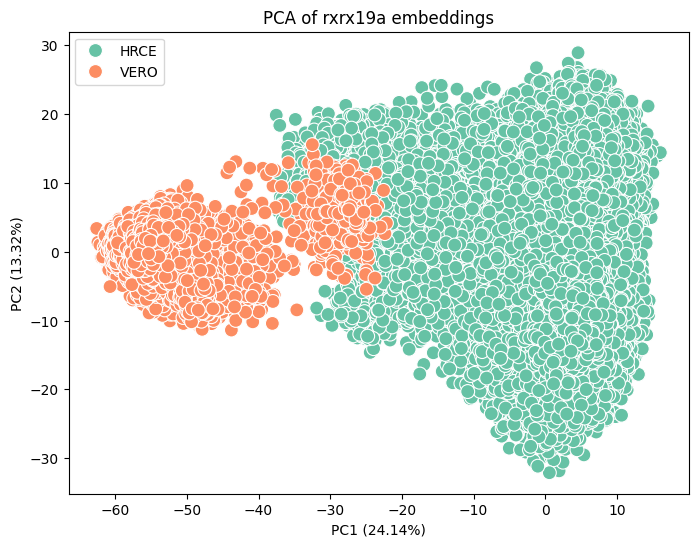

In [15]:
plot_pca(adata_rxrx19a, title='PCA of rxrx19a embeddings', color='cell_type')

In [16]:
def plot_umap(adata, color=None, n_neighbors=30, min_dist=0.3, metric='euclidean', n_epochs=None):
    """
    Plots UMAP of embeddings in AnnData, optionally coloring by a metadata attribute.
    
    Parameters:
    adata (AnnData): The AnnData object containing embeddings and metadata.
    color (str): The column in the metadata to use for coloring the points (optional).
    n_neighbors (int): Number of neighbors for UMAP.
    min_dist (float): Minimum distance between points in the UMAP embedding.
    metric (str): Distance metric for UMAP (e.g., 'euclidean', 'cosine').
    """
    # run UMAP on the embeddings
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, n_epochs=n_epochs)
    umap_result = reducer.fit_transform(adata.X)
    
    # create a dataframe for the UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs.index)
    
    # merge with the metadata if color is provided
    if color:
        umap_df[color] = adata.obs[color]
    
    # plot the UMAP
    plt.figure(figsize=(8, 6))
    if color:
        sns.scatterplot(x='UMAP1', y='UMAP2', hue=color, data=umap_df, palette='Set2', s=100)
        plt.legend(loc='best')
    else:
        sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, s=100)
    
    plt.title('UMAP plot')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

    return umap_df

/home/sairavella/newvol/home/sairavella/newvol/miniconda3/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


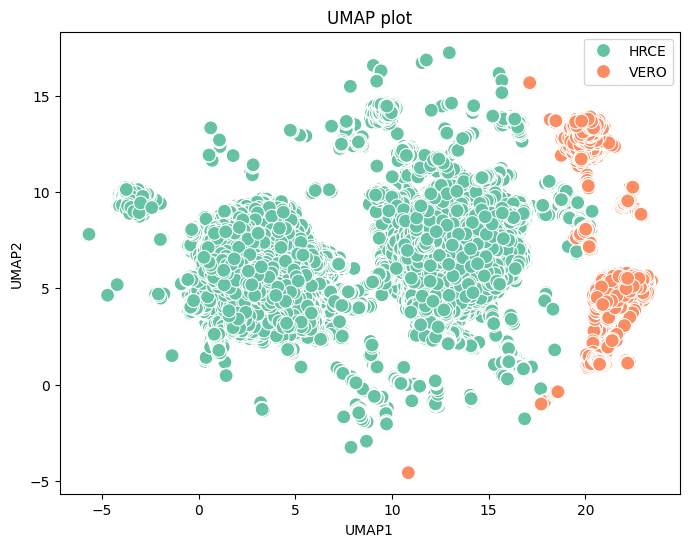

,UMAP1,UMAP2,cell_type
site_id,,,
HRCE-1_1_AA02_1,12.670607,7.166228,HRCE
HRCE-1_1_AA02_2,13.132825,6.926023,HRCE
HRCE-1_1_AA02_3,13.583307,7.239485,HRCE
HRCE-1_1_AA02_4,12.661148,7.585328,HRCE
HRCE-1_1_AA03_1,11.703634,7.168578,HRCE
...,...,...,...
VERO-2_2_Z46_4,22.108723,4.985942,VERO
VERO-2_2_Z47_1,22.081362,5.541600,VERO
VERO-2_2_Z47_2,21.101877,4.302293,VERO


In [19]:
plot_umap(adata=adata_rxrx19a, color='cell_type', metric='cosine', n_epochs=100)

In [20]:
adata_rxrx19a[adata_rxrx19a.obs['treatment'].isna() & adata_rxrx19a.obs['disease_condition'].isna(), :].obs

,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
site_id,,,,,,,,,,
HRCE-1_1_AC08_1,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,1,NaN,NaN,NaN,NaN
HRCE-1_1_AC08_2,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,2,NaN,NaN,NaN,NaN
HRCE-1_1_AC08_3,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,3,NaN,NaN,NaN,NaN
HRCE-1_1_AC08_4,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,4,NaN,NaN,NaN,NaN
HRCE-1_1_AC16_1,HRCE-1_1_AC16,HRCE,HRCE-1,1,AC16,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
VERO-2_2_D32_4,VERO-2_2_D32,VERO,VERO-2,2,D32,4,NaN,NaN,NaN,NaN
VERO-2_2_D40_1,VERO-2_2_D40,VERO,VERO-2,2,D40,1,NaN,NaN,NaN,NaN
VERO-2_2_D40_2,VERO-2_2_D40,VERO,VERO-2,2,D40,2,NaN,NaN,NaN,NaN


In [22]:
control_huvec_site_ids = adata_rxrx19b[adata_rxrx19b.obs['treatment'].isna() & adata_rxrx19b.obs['disease_condition'].isna(), :].obs.index

len(control_huvec_site_ids)


264

In [23]:
control_huvec_vector = adata_rxrx19b[control_huvec_site_ids, :].to_df().mean()

In [24]:
from scipy.spatial.distance import cdist

def compute_distances(adata, control_vector, metric='cosine'):
    """
    Computes the cosine distance from each sample in the embeddings to the control vector.
    
    Parameters:
    adata (AnnData): The AnnData object containing embeddings.
    control_vector (np.ndarray): The vector representing the control (mean of untreated, healthy HUVEC).
    metric (str): The distance metric to use (e.g., 'cosine', 'euclidean').
    
    Returns:
    distances (np.ndarray): Array of distances for each sample to the control.
    """
    # reshape control vector to (1, n_features) to match input for cdist
    control_vector = control_vector.reshape(1, -1)
    
    # compute distances between each sample in adata.X and the control vector using cosine distance
    distances = cdist(adata.X, control_vector, metric=metric)
    
    # flatten the result since cdist returns a 2D array
    return distances.flatten()

# example usage
control_vector = adata_rxrx19b[control_huvec_site_ids, :].to_df().mean().values

distances = compute_distances(adata_rxrx19b, control_vector, metric='cosine')

# attach the distances to the AnnData object for easier plotting/analysis
adata_rxrx19b.obs['cosine_distance_to_control'] = distances


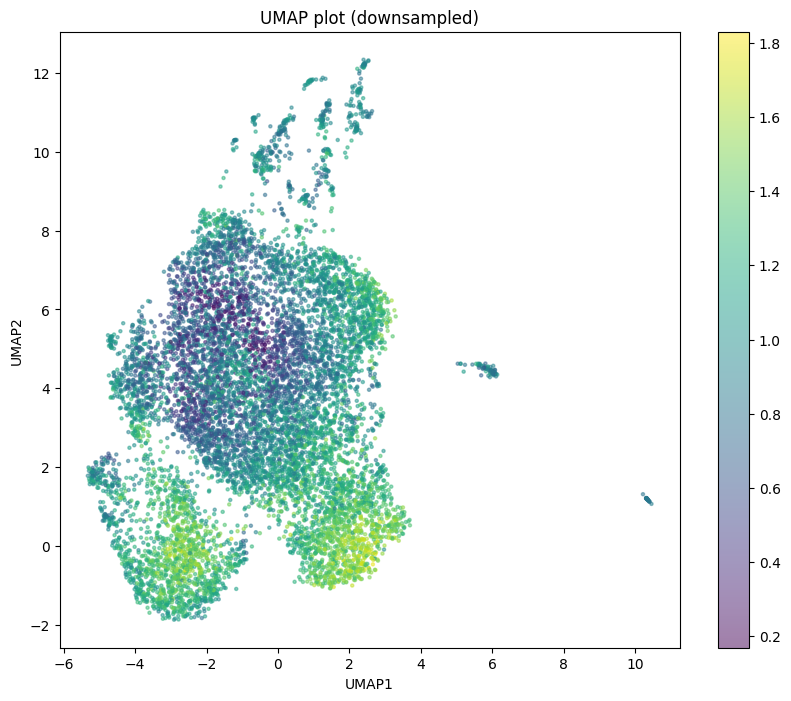

In [32]:
#umap_result =plot_umap(adata_rxrx19b, color='cosine_distance_to_control', metric='cosine', n_epochs=100)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_umap(adata, color=None, n_neighbors=30, min_dist=0.3, metric='euclidean', n_epochs=None, max_points=10000):
    # Downsample if necessary
    if adata.n_obs > max_points:
        idx = np.random.choice(adata.n_obs, max_points, replace=False)
        adata_sample = adata[idx, :]
    else:
        adata_sample = adata

    # run UMAP on the embeddings
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, n_epochs=n_epochs)
    umap_result = reducer.fit_transform(adata_sample.X)
    
    # create a dataframe for the UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata_sample.obs.index)
    
    # merge with the metadata if color is provided
    if color:
        umap_df[color] = adata_sample.obs[color]
    
    # plot the UMAP
    plt.figure(figsize=(10, 8))
    if color:
        scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df[color], cmap='viridis', s=5, alpha=0.5)
        plt.colorbar(scatter)
    else:
        plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], s=5, alpha=0.5)
    
    plt.title('UMAP plot' + (' (downsampled)' if adata.n_obs > max_points else ''))
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

    return umap_df

# Usage:
umap_result = plot_umap(adata_rxrx19b, color='cosine_distance_to_control', metric='cosine', n_epochs=100, max_points=10000)

In [28]:
import numpy as np

def plot_umap(adata, color=None, n_neighbors=30, min_dist=0.3, metric='euclidean', n_epochs=None, max_points=10000):
    """
    Plots UMAP of embeddings in AnnData, optionally coloring by a metadata attribute.
    Downsamples data if it exceeds max_points.
    
    Parameters:
    ... (previous parameters) ...
    max_points (int): Maximum number of points to plot. If exceeded, data will be downsampled.
    """
    # Downsample if necessary
    if adata.n_obs > max_points:
        idx = np.random.choice(adata.n_obs, max_points, replace=False)
        adata_sample = adata[idx, :]
    else:
        adata_sample = adata

    # run UMAP on the embeddings
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, n_epochs=n_epochs)
    umap_result = reducer.fit_transform(adata_sample.X)
    
    # create a dataframe for the UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata_sample.obs.index)
    
    # merge with the metadata if color is provided
    if color:
        umap_df[color] = adata_sample.obs[color]
    
    # plot the UMAP
    plt.figure(figsize=(8, 6))
    if color:
        sns.scatterplot(x='UMAP1', y='UMAP2', hue=color, data=umap_df, palette='Set2', s=5)
        plt.legend(loc='best', markerscale=2)
    else:
        sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, s=5)
    
    plt.title('UMAP plot (downsampled)' if adata.n_obs > max_points else 'UMAP plot')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

    return umap_df

# Usage:
umap_result = plot_umap(adata_rxrx19b, color='cosine_distance_to_control', metric='cosine', n_epochs=100, max_points=10000)

ValueError: Image size of 689x209497 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x600 with 1 Axes>

In [ ]:
umap_result.loc[control_huvec_site_ids, :]['cosine_distance_to_control'].hist()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
with sns.plotting_context('poster'):
    sns.scatterplot(umap_result, x='UMAP1', y='UMAP2', hue='cosine_distance_to_control', palette='Spectral_r')